## OBJECTIVE 1
Profile & QA the data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Listings.csv', sep=',', encoding='latin1', index_col=False)
data.info()

C:\Users\gobel\AppData\Local\Temp\ipykernel_19848\3254645708.py:1: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Listings.csv', sep=',', encoding='latin1', index_col=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

### Data Prep

In [3]:
data['host_since'] = pd.to_datetime(data['host_since'])

### Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’

In [4]:
paris_data = data[data['city']=='Paris']
filtered_columns = ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']

paris_data_selected = paris_data[filtered_columns]
paris_data_selected

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [5]:
columns = ['host_since','host_response_time']
data[columns]

,host_since,host_response_time
0,2011-12-03,NaN
1,2013-11-29,NaN
2,2014-07-31,NaN
3,2013-12-17,NaN
4,2014-12-14,NaN
...,...,...
279707,2015-04-13,NaN
279708,2013-11-27,NaN
279709,2012-04-27,NaN
279710,2015-07-16,NaN


### QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

In [15]:
data['host_response_time'].isna().sum()

128782

In [19]:
int_columns = data.select_dtypes(include=['int64'])
int_columns.columns

Index(['listing_id', 'host_id', 'accommodates', 'price', 'minimum_nights',
       'maximum_nights'],
      dtype='object')

In [29]:
col_int = ['accommodates', 'price', 'minimum_nights',
       'maximum_nights','host_total_listings_count','bedrooms','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location',
       'review_scores_value']
data[col_int].mean()

accommodates                       3.288736
price                            608.792737
minimum_nights                     8.050967
maximum_nights                 27558.596667
host_total_listings_count         24.581612
bedrooms                           1.515509
review_scores_rating              93.405195
review_scores_accuracy             9.565476
review_scores_cleanliness          9.312869
review_scores_checkin              9.701534
review_scores_communication        9.698593
review_scores_location             9.633994
review_scores_value                9.335364
dtype: float64

### Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)

In [35]:
paris_listings_neighbourhood = paris_data_selected.groupby('neighbourhood').mean()
paris_listings_neighbourhood.sort_values(by='price', ascending=True)

C:\Users\gobel\AppData\Local\Temp\ipykernel_19848\2009096574.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  paris_listings_neighbourhood = paris_data_selected.groupby('neighbourhood').mean()


,accommodates,price
neighbourhood,,
Menilmontant,2.918574,74.942257
Buttes-Chaumont,2.984710,82.690182
Buttes-Montmartre,2.848280,87.209479
Reuilly,3.002638,89.058402
Popincourt,2.916371,90.559459
Gobelins,2.964004,98.110184
Observatoire,2.986720,101.866801
Batignolles-Monceau,2.942032,102.612702
Enclos-St-Laurent,3.060933,102.967156


In [56]:
paris_listings_neighbourhood = (
    paris_data_selected
    .groupby('neighbourhood')
    .agg({"price":"mean"})
    .sort_values(by="price", ascending=True)
)

paris_listings_neighbourhood

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459
Gobelins,98.110184
Observatoire,101.866801
Batignolles-Monceau,102.612702
Enclos-St-Laurent,102.967156


## OBJECTIVE 2
### Prepare the data for visualization

### Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

In [44]:
most_expensive_neighborhood = paris_listings_neighbourhood['price'].idxmax()
paris_listings_most_expensive_neighborhood = paris_data_selected[paris_data_selected['neighbourhood'] == most_expensive_neighborhood]

paris_listings_accommodations = paris_listings_most_expensive_neighborhood.groupby('accommodates')['price'].mean().sort_index()
paris_listings_accommodations


accommodates
0       0.000000
1      79.522222
2     155.103352
3     152.828767
4     212.096070
5     328.817073
6     355.508571
7     411.538462
8     405.518519
9     440.272727
10    500.857143
11    805.000000
12    529.625000
13    842.500000
14    971.000000
16    800.000000
Name: price, dtype: float64

#### same task with .query() method

In [69]:
paris_listings_accomodations = (
    paris_data_selected
    .query("neighbourhood == 'Elysee'")
    .groupby('accommodates')
    .agg({"price": "mean"})
)
paris_listings_accomodations

,price
accommodates,
0,0.000000
1,79.522222
2,155.103352
3,152.828767
4,212.096070
5,328.817073
6,355.508571
7,411.538462
8,405.518519


### Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

In [51]:
paris_listings_over_time = (
    paris_data_selected
    .set_index('host_since')
    .resample("Y")
    .agg({"neighbourhood":"count","price" : "mean"})
)

paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


## OBJECTIVE 3
Visualize the data and summarize findings

### Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed

In [58]:
import matplotlib.pyplot as plt

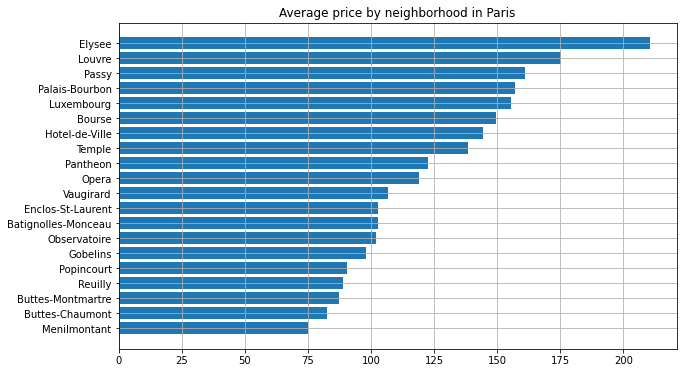

In [67]:
plt.figure(figsize=(10,6))
plt.barh(paris_listings_neighbourhood.index,paris_listings_neighbourhood['price'])
plt.title("Average price by neighborhood in Paris")
plt.grid(True)
plt.show()

### Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed

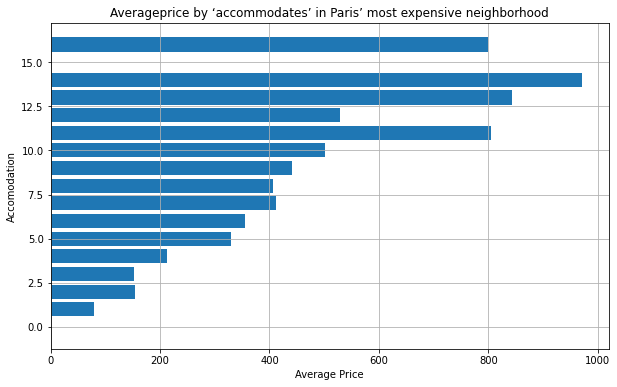

In [72]:
plt.figure(figsize=(10,6))
plt.barh(paris_listings_accomodations.index,paris_listings_accomodations['price'])
plt.title("Averageprice by ‘accommodates’ in Paris’ most expensive neighborhood")
plt.grid(True)
plt.xlabel("Average Price")
plt.ylabel("Accomodation")
plt.show()

### Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed

In [73]:
paris_listings_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8871,114.159847


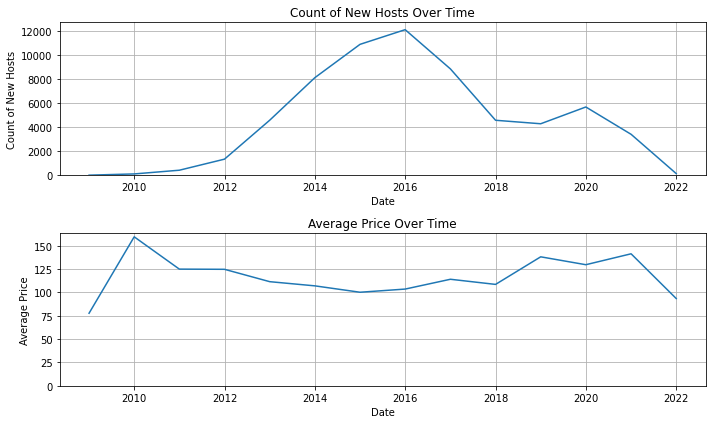

In [81]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)  
plt.plot(paris_listings_over_time.index, paris_listings_over_time['neighbourhood'])
plt.title("Count of New Hosts Over Time")
plt.xlabel("Date")
plt.ylabel("Count of New Hosts")
plt.grid(True)
plt.ylim(0)  

plt.subplot(2, 1, 2)  
plt.plot(paris_listings_over_time.index, paris_listings_over_time['price'])
plt.title("Average Price Over Time")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.grid(True)
plt.ylim(0) 

plt.tight_layout() 
plt.show()

### Create a dual axis line chart to show both new hosts and average price over time

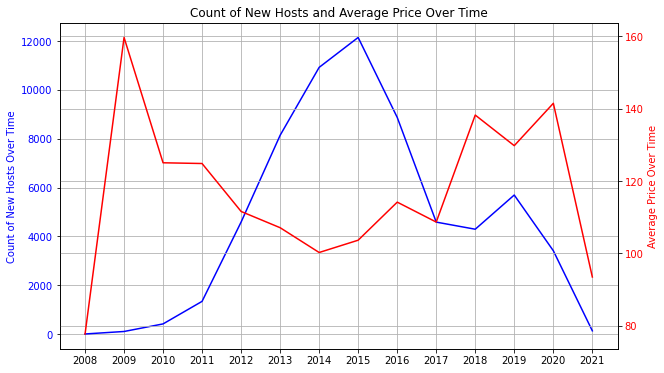

In [95]:
plt.figure(figsize=(10,6))

ax1 = plt.gca()
ax1.plot(paris_listings_over_time.index, paris_listings_over_time['neighbourhood'],color='blue', label='Count of New Hosts')
ax1.set_ylabel("Count of New Hosts Over Time",color='blue')
ax1.tick_params(axis='y',labelcolor='blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(paris_listings_over_time.index, paris_listings_over_time['price'],color='red', label='Average Price')
ax2.set_ylabel("Average Price Over Time",color='red')
ax2.tick_params(axis='y',labelcolor='red')
ax2.grid(True)

plt.title('Count of New Hosts and Average Price Over Time')
plt.xlabel('Date')
plt.xticks(paris_listings_over_time.index, labels=[x.strftime('%Y') for x in paris_listings_over_time.index], rotation=45)
plt.show()